<a href="https://colab.research.google.com/github/hoooon89/DonkeyColab/blob/master/Meetup_Donkey_Car_Training_using_Google_Colab_t02_0825.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Donkey Car Colab with Accelerated Hardware (Tensorflow GPU)

This notebook is to quickly train your donkey car or self driving RC car model using Google Colab.

# Install TensorFlow 1.13.1


In [0]:
!pip install tensorflow-gpu==1.13.1

     |████████████████████████████████| 345.2MB 82kB/s 
     |████████████████████████████████| 368kB 51.2MB/s 
     |████████████████████████████████| 3.2MB 50.4MB/s 
ERROR: tensorflow 1.14.0 has requirement tensorboard<1.15.0,>=1.14.0, but you'll have tensorboard 1.13.1 which is incompatible.
ERROR: tensorflow 1.14.0 has requirement tensorflow-estimator<1.15.0rc0,>=1.14.0rc0, but you'll have tensorflow-estimator 1.13.0 which is incompatible.
  Found existing installation: tensorflow-estimator 1.14.0
    Uninstalling tensorflow-estimator-1.14.0:
      Successfully uninstalled tensorflow-estimator-1.14.0
  Found existing installation: tensorboard 1.14.0
    Uninstalling tensorboard-1.14.0:
      Successfully uninstalled tensorboard-1.14.0


# Check GPU allocation
If "Found GPU at: / device: GPU: 0" is displayed, the GPU is ready to use.

In [0]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


# Git Clone the donkey respository

In [0]:
!git clone https://github.com/autorope/donkeycar.git donkey

Cloning into 'donkey'...
remote: Enumerating objects: 71, done.
remote: Counting objects: 100% (71/71), done.
remote: Compressing objects: 100% (59/59), done.
remote: Total 10652 (delta 32), reused 27 (delta 10), pack-reused 10581
Receiving objects: 100% (10652/10652), 58.78 MiB | 29.17 MiB/s, done.
Resolving deltas: 100% (6572/6572), done.


# Install donkey car

In [0]:
!pip3 install -e donkey

Obtaining file:///content/donkey
     |████████████████████████████████| 92kB 8.5MB/s 
  Created wheel for paho-mqtt: filename=paho_mqtt-1.4.0-cp36-none-any.whl size=48331 sha256=43e528da748937f275b010dd0c53ea7d9fb9ebacfced00f4a1b468ecc636d395
  Stored in directory: /root/.cache/pip/wheels/82/e5/de/d90d0f397648a1b58ffeea1b5742ac8c77f71fd43b550fa5a5
Successfully built paho-mqtt
  Running setup.py develop for donkeycar


# Create Project
d2 is the project name and you can rename it with your choice. Make sure if you rename d2 below, that you change all the remaining part of the codes as well in this notebook.

In [0]:
!donkey createcar --path /content/d2

using donkey v3.1.0 ...
Creating car folder: /content/d2
making dir  /content/d2
Creating data & model folders.
making dir  /content/d2/models
making dir  /content/d2/data
making dir  /content/d2/logs
Copying car application template: complete
Copying car config defaults. Adjust these before starting your car.
Copying train script. Adjust these before starting your car.
Copying my car config overrides
Donkey setup complete.


#Prepare the data: upload data.zip and unzip data
When the following code is executed, a file upload form appears. Upload data.zip.
The data.zip file is the folder found from your raspberry pi. Copy the data to your pc/mac and then zip it as data.zip
data.zip is uploaded under / content. Move to /content/d2/data using the mv command and unzip it.

<img src="https://i1.wp.com/techwithsach.com/wp-content/uploads/2019/06/Screen-Shot-2019-06-29-at-7.43.15-PM.png?fit=1024%2C658&amp;ssl=1" alt="Train an autopilot using Colab" class="wp-image-872"/>

In [0]:
import os
from google.colab import files

if(os.path.exists("/content/data.zip")):
   os.remove("/content/data.zip")
if(os.path.exists("/content/d2/data/data.zip")):
   os.remove("/content/d2/data/data.zip")

In [0]:
!pip install -U -q PyDrive

     |████████████████████████████████| 993kB 1.1MB/s 


In [0]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
file_id = '13KkYL1j0N1oakoo3bxT4paZ8PgbKU3AH' # URL id. 
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile('/content/d2/data/data.zip')

In [0]:
!ls #to verify content

adc.json  d2  donkey  sample_data


In [0]:
%cd /content/d2/data

/content/d2/data


In [0]:
!ls

data.zip


In [0]:
# import os
# from google.colab import files

# if(os.path.exists("/content/data.zip")):
#   os.remove("/content/data.zip")
# if(os.path.exists("/content/d2/data/data.zip")):
#   os.remove("/content/d2/data/data.zip")
   
# uploaded = files.upload()

# WORK_FOLDER = "/content/d2/data/"
# if(os.path.exists(WORK_FOLDER) == False):
#  os.makedirs(WORK_FOLDER)

# !mv /content/data.zip /content/d2/data/
%cd /content/d2/data/
!unzip -o data.zip

/content/d2/data
Archive:  data.zip
  inflating: tub_12_19-09-06/1000_cam-image_array_.jpg  
  inflating: tub_12_19-09-06/1001_cam-image_array_.jpg  
  inflating: tub_12_19-09-06/1002_cam-image_array_.jpg  
  inflating: tub_12_19-09-06/1003_cam-image_array_.jpg  
  inflating: tub_12_19-09-06/1004_cam-image_array_.jpg  
  inflating: tub_12_19-09-06/1005_cam-image_array_.jpg  
  inflating: tub_12_19-09-06/1006_cam-image_array_.jpg  
  inflating: tub_12_19-09-06/1007_cam-image_array_.jpg  
  inflating: tub_12_19-09-06/1008_cam-image_array_.jpg  
  inflating: tub_12_19-09-06/1009_cam-image_array_.jpg  
  inflating: tub_12_19-09-06/100_cam-image_array_.jpg  
  inflating: tub_12_19-09-06/1010_cam-image_array_.jpg  
  inflating: tub_12_19-09-06/1011_cam-image_array_.jpg  
  inflating: tub_12_19-09-06/1012_cam-image_array_.jpg  
  inflating: tub_12_19-09-06/1013_cam-image_array_.jpg  
  inflating: tub_12_19-09-06/1014_cam-image_array_.jpg  
  inflating: tub_12_19-09-06/1015_cam-image_array_.jp

# Clean up your data folder
make sure you have only the tub folders and its associated images and JSON files.

In [0]:
!rm /content/d2/data/data.zip

In [0]:
ls

tub_12_19-09-06/


# Train your model

<img src="https://i2.wp.com/techwithsach.com/wp-content/uploads/2019/06/Donkey-Car-training-using-Google-Colab.png?fit=1024%2C509&amp;ssl=1" alt="Donkey Car training using Google Colab" class="wp-image-879"/>

In [0]:
!python /content/d2/manage.py train --model /content/d2/models/mypilot.h5

using donkey v3.1.0 ...
loading config file: /content/d2/config.py
loading personal config over-rides

config loaded
2019-09-06 12:26:59.833831: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 AVX512F FMA
2019-09-06 12:26:59.932426: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2019-09-06 12:26:59.933167: I tensorflow/compiler/xla/service/service.cc:150] XLA service 0x2d0ef20 executing computations on platform CUDA. Devices:
2019-09-06 12:26:59.933201: I tensorflow/compiler/xla/service/service.cc:158]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
2019-09-06 12:26:59.935006: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2000125000 Hz
2019-09-06 12:26:59.935249: I tensorflow/compiler/xla/service/service.cc:150

#Copy trained model to the Donkey Car.
Once the training is complete, you will find the mypilot model file under d2/models/ folder location.
1. Download the mypilot file to your PC or Mac.
2. Copy the file from your PC or Mac to the Raspberry Pi using Filezilla or scp command.

In [0]:
%cd /content/d2/models/

/content/d2/models


In [0]:
!ls

mypilot.h5  mypilot.h5_loss_acc_0.037156.png


In [0]:
#download the finished file:

from google.colab import files
files.download(model)

NameError: ignored

loading config file: /content/d2/config.py
loading personal config over-rides

config loaded
batch size 128
"get_model_by_type" model Type is: categorical
training with model type <class 'donkeycar.parts.keras.KerasCategorical'>
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
img_in (InputLayer)             (None, 120, 160, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 58, 78, 24)   1824        img_in[0][0]                     
__________________________________________________________________________________________________
dropout_12 (Dropout)            (None, 58, 78, 24)   0           conv2d_1[0][0]                   
______________________________________________________________________________

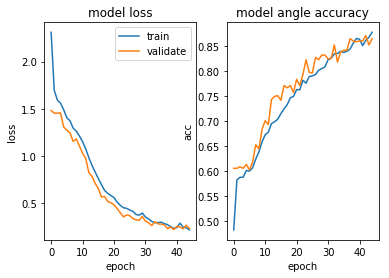

In [0]:
#start training!
import sys
sys.path.append('/content/d2')
sys.path.append('/content/donkey')
import donkeycar as dk
from train import multi_train

config_path = '/content/d2/config.py'
cfg = dk.load_config(config_path)

#You can change some settings here if you like
print('batch size', cfg.BATCH_SIZE)
tub = "/content/d2/data/*"
model = "/content/d2/models/mypilot.h5"
transfer = None
model_type = "categorical"
continuous = False
aug = False

multi_train(cfg, tub, model, transfer, model_type, continuous, aug)

In [0]:
%cd /content/d2/models/

/content/d2/models


In [0]:
!ls

mypilot.h5  mypilot.h5_loss_acc_0.037156.png  mypilot.h5_loss_acc_0.217503.png


In [0]:
#download the finished file:

from google.colab import files
files.download('mypilot.h5')

In [0]:
#download the finished file:

from google.colab import files
files.download('mypilot.h5_loss_acc_0.243074.png')

# Drive using the Autopilot mode
Continue to follow the remaining part of the tutorial from **techwithsach.com**
